#  DATA PREPROCESSING 

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

## 4.2 Import Cleaned Dataset

In [247]:
df = pd.read_csv('Algerian_forest_fires_dataset_Cleaned.csv')

In [248]:
## encoding of the categories in classes
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [249]:
df1=df.drop(['day','month','year'],axis=1)

In [250]:
df1.corr(numeric_only=True)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [251]:
# Split the data into features (X) and target variable (y)
X = df[['FFMC','ISI','FWI']]
y = df['Classes']

In [252]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Logistic Regression

In [253]:
# Create logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [254]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1])

In [255]:
# check accuracy and cofusion matrix
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test,y_pred)

print("Logistic Regression")
print ("Accuracy Score value:",score)
print (cr)

Logistic Regression
Accuracy Score value: 0.9508196721311475
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.91      0.96        35

    accuracy                           0.95        61
   macro avg       0.95      0.96      0.95        61
weighted avg       0.96      0.95      0.95        61



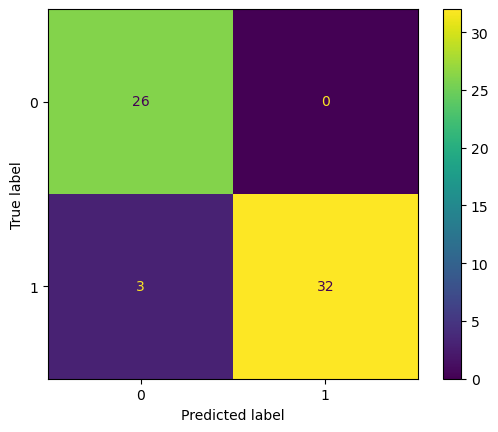

In [256]:
loreg_cm = ConfusionMatrixDisplay.from_estimator( model,X_test, y_test)

##  Decision Tree

In [257]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Accuracy:",score)
print(cr)

Accuracy: 0.9836065573770492
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        35

    accuracy                           0.98        61
   macro avg       0.98      0.99      0.98        61
weighted avg       0.98      0.98      0.98        61



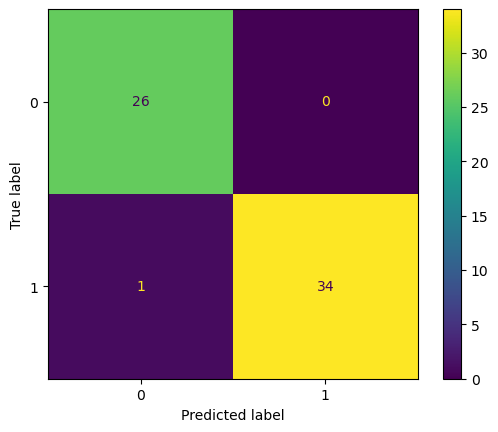

In [258]:
dt_cm = ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test)

## Random Forest

In [265]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
score = accuracy_score(y_test,rfc_pred)
cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value:",score)
print (cr)

Random Forest
Accuracy Score value: 0.9836065573770492
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.99        35

    accuracy                           0.98        61
   macro avg       0.98      0.99      0.98        61
weighted avg       0.98      0.98      0.98        61



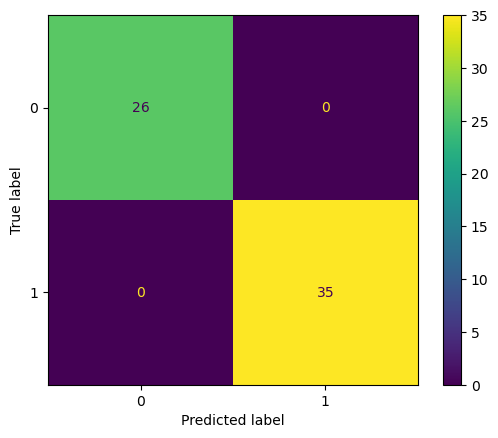

In [260]:
rf_cm = ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

## K_Neighbors Classifier

In [261]:
# KNeighborsClassifier to Train from SKlearn
knnc = KNeighborsClassifier()
knnc.fit(X_train,y_train)
knn_pred = knnc.predict(X_test)
score = accuracy_score(y_test,knn_pred)
cr = classification_report(y_test,knn_pred)

print("KNeighbors Classifier")
print ("Accuracy Score value:",score)
print (cr)

KNeighbors Classifier
Accuracy Score value: 0.9508196721311475
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        26
           1       1.00      0.91      0.96        35

    accuracy                           0.95        61
   macro avg       0.95      0.96      0.95        61
weighted avg       0.96      0.95      0.95        61



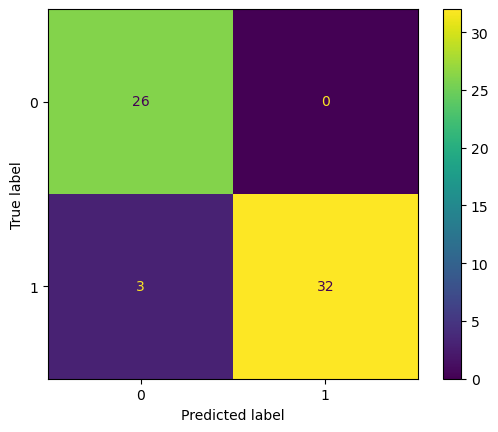

In [262]:
knn_cm = ConfusionMatrixDisplay.from_estimator(knnc, X_test, y_test)

## XGboost Model

In [263]:
# Import KNeighborsClassifier to Train from SKlearn
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
score = accuracy_score(y_test, xgb_pred)
cr = classification_report(y_test, xgb_pred)

print("XGboost Classifier")
print ("Accuracy Score value:",score)
print (cr)

XGboost Classifier
Accuracy Score value: 0.9672131147540983
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.94      0.97        35

    accuracy                           0.97        61
   macro avg       0.96      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



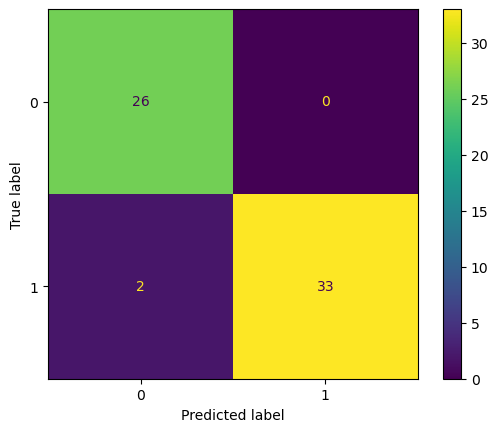

In [264]:
xgb_cm = ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

**Accuracy score Results Summary**

| Models     | Accuracy score  |
| ----------- | ----------- |
| XGboost classifier     | 96.72 % |
| Decision Tree Classifier  | 98.36 % |
| Logistic Regression Accurracy  | 95.08 % |
| KNeighbors Classifier  | 95.08 %|
| Random Forest Classifier  | 98.36 % |